In [1204]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with np.load('dimredux-challenge-01-data.npz') as fh:
    data_x = fh['data_x']
    validation_x = fh['validation_x']
    validation_y = fh['validation_y']

# TRAINING DATA: 
print(data_x.shape, data_x.dtype)

# VALIDATION DATA: X + y
print(validation_x.shape, validation_x.dtype)
print(validation_y.shape, validation_y.dtype)


(100000, 3) float64
(1000, 3) float64
(1000,) int32


# Visualization

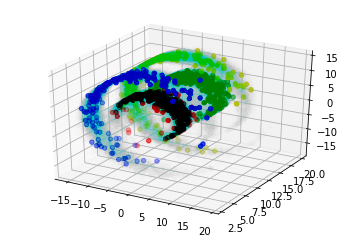

In [1205]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = zip(*data_x)
ax.scatter(x,y,z,c='c',alpha=0.005)
for cls, color in enumerate(['r','g','y','b']):
    x,y,z = zip(*validation_x[validation_y == cls])
    ax.scatter(x,y,z,c=color)
    


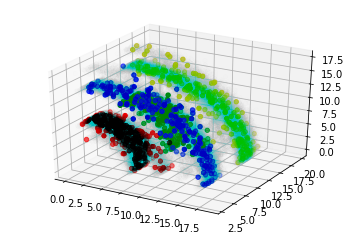

In [1206]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = zip(*data_x)
ax.scatter(np.abs(x),y,np.abs(z),c='c',alpha=0.005)
for cls, color in enumerate(['r','g','y','b']):
    x,y,z = zip(*validation_x[validation_y == cls])
    ax.scatter(np.abs(x),y,np.abs(z),c=color)

In [1207]:
# data_x[:,0] = np.abs(data_x[:,0])
# data_x[:,2] = np.abs(data_x[:,2])
# 
# validation_x[:,0] = np.abs(validation_x[:,0])
# validation_x[:,2] = np.abs(validation_x[:,2])

In [1208]:
data_x[:,0]

array([ -7.74340987, -10.57155779, -14.37425187, ...,   3.11803615,
         5.09292333,  -9.36430901])

# Remove mean and correleation (whitening)

In [1209]:
mean = data_x.mean(axis=0)
data_x_centered = data_x - mean
validation_x_centered = validation_x - mean

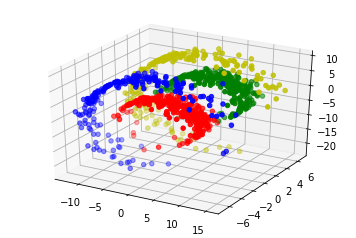

In [1210]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cls, color in enumerate(['r','g','y','b']):
    x,y,z = zip(*validation_x_centered[validation_y == cls])
    ax.scatter(x,y,z,c=color)

In [1211]:
def whiten(X,X_val,fudge=1E-5):
    
    # the matrix X should be observations-by-components
    mean = np.mean(X, axis = 0)
    X_val -= mean
    X -= mean
    
    # get the covariance matrix
    Xcov = np.dot(X.T,X) / X.shape[0]

    # eigenvalue decomposition of the covariance matrix
    val, Vec = np.linalg.eigh(Xcov)
    
    Xrot = np.dot(X, Vec)
    X_val_rot = np.dot(X_val, Vec)
    
    X_white = Xrot / np.sqrt(val + 1e-5)
    X_val_white = X_val_rot / np.sqrt(val + 1e-5)

    # a fudge factor can be used so that eigenvectors associated with
    # small eigenvalues do not get overamplified.
    #D = np.diag(1. / np.sqrt(val+fudge))

    # whitening matrix
    #W = np.dot(np.dot(V, D), V.T)

    # multiply by the whitening matrix
    #X_white = np.dot(X, W)

    return X_white, X_val_white

In [1212]:
data_x_white,validation_x_white = whiten(data_x,validation_x)
#normalizing_factors = 1/np.abs(data_x_white).mean(axis=0)
#data_x_white *= normalizing_factors
#validation_x_white = np.dot(validation_x_centered,W) * normalizing_factors

In [1213]:
data_x_white.std(axis=0)

array([ 0.99999967,  0.99999988,  0.99999992])

In [1214]:
validation_x_white.std(axis=0)

array([ 0.99644213,  0.97597863,  0.9817804 ])

In [1215]:
validation_x_white.mean()

0.0091424848968534502

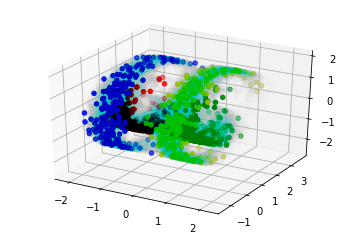

In [1216]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = zip(*data_x_white)
ax.scatter(x,y,z,c='c',alpha=0.005)
for cls, color in enumerate(['r','g','y','b']):
    x,y,z = zip(*validation_x_white[validation_y == cls])
    ax.scatter(x,y,z,c=color)

In [1217]:
data_x_white2 = data_x_white
#data_x_white[:,1] = np.abs(data_x_white[:,1])
data_x_white2[:,2] = np.abs(data_x_white[:,2])


validation_x_white2 = validation_x_white
#validation_x_white[:,1] = np.abs(validation_x_white[:,1])
validation_x_white2[:,2] = np.abs(validation_x_white[:,2])

#

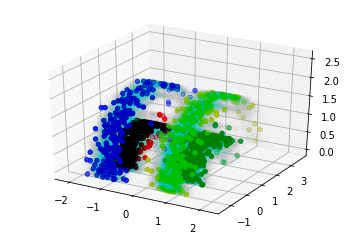

In [1218]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = zip(*data_x_white2)
ax.scatter(x,y,z,c='c',alpha=0.005)
for cls, color in enumerate(['r','g','y','b']):
    x,y,z = zip(*validation_x_white2[validation_y == cls])
    ax.scatter(x,y,z,c=color)

In [1219]:
data_x_white2,validation_x_white2 = whiten(data_x_white2,validation_x_white2)

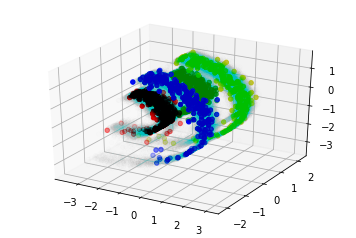

In [1220]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = zip(*data_x_white2)
ax.scatter(x,y,z,c='c',alpha=0.005)
for cls, color in enumerate(['r','g','y','b']):
    x,y,z = zip(*validation_x_white2[validation_y == cls])
    ax.scatter(x,y,z,c=color)

In [1221]:
data_x_white = data_x_white2
validation_x_white = validation_x_white2

data_x_white3 = data_x_white2
#data_x_white[:,1] = np.abs(data_x_white[:,1])
data_x_white3[:,2] = np.abs(data_x_white2[:,2])


validation_x_white3 = validation_x_white2
#validation_x_white[:,1] = np.abs(validation_x_white[:,1])
validation_x_white3[:,2] = np.abs(validation_x_white2[:,2])

data_x_white3,validation_x_white3 = whiten(data_x_white3,validation_x_white3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = zip(*data_x_white3)
ax.scatter(x,y,z,c='c',alpha=0.005)
for cls, color in enumerate(['r','g','y','b']):
    x,y,z = zip(*validation_x_white3[validation_y == cls])
    ax.scatter(x,y,z,c=color)

# Build time lagged auto encoder

In [1222]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils
from torch.autograd import Variable

In [1223]:
class timeLaggedDataset(torch.utils.data.Dataset):
    def __init__(self, x_array, x_lag, y_lag, overlay=0):
        """
        x_array: array with time dimension at axis=0 
        x_lag: length of x
        y_lag: length of y
        overlay: amount of shared datapoints at end of x and beginning of y
        """
        #x_array = np.expand_dims(x_array, axis=2)
        self.data = torch.from_numpy(x_array).float()

    def __len__(self):
        return len(self.data) - x_lag + 1 - y_lag + overlay

    def __getitem__(self, i):
        return (self.data[i:i+x_lag]).permute(1,0), self.data[i+x_lag-overlay:i+x_lag+y_lag-overlay].permute(1,0)

In [1224]:
x_lag = 16
y_lag = 4
overlay = 2
batch_size = 200
lagged_dset = timeLaggedDataset(data_x_white,x_lag,y_lag,overlay)
data_loader = utils.DataLoader(lagged_dset, batch_size=batch_size, shuffle=True)

In [1225]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layers = nn.Sequential(
            
            nn.Conv1d(3,64,4,stride=1,padding=2),
            nn.ReLU(),
            nn.Conv1d(64,64,4,stride=1,padding=2),
            nn.ReLU(),
            #nn.Conv1d(x_lag,15,1),
            # #nn.ReLU(),
            # #nn.Linear(x_lag*3,32),
            # #nn.ReLU(),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Linear(32,16),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(16,8),
            # nn.ReLU(),
            # nn.Linear(8,1),
            # #nn.ReLU(),
            # #nn.Linear(4,1),
            # #nn.ReLU()
        )
        
        self.fclayers = nn.Sequential(
            nn.Linear(1152,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,32),
            nn.ReLU(),
            nn.Linear(32,1),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(16,8),
            # nn.ReLU(),
            # nn.Linear(8,1),
            # #nn.ReLU(),
            # #nn.Linear(4,1),
            # #nn.ReLU()
        )
                      
    def forward(self,x):
        #out = x.view(x.size()[0], -1)
        #print(out.shape)
        out = self.layers(x)
        #print(out.size())
        out = out.view(out.size()[0], -1)
        #print(out.size())
        out = self.fclayers(out)
        
        return out

    
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.fclayers = nn.Sequential(
            nn.Linear(1,8),
            nn.ReLU(),
            nn.Linear(8,16),
            nn.ReLU(),
            #nn.Linear(64,y_lag*3),
        )
        self.convlayers = nn.Sequential(
            nn.ConvTranspose1d(4,8,2),
            nn.ReLU(),
            nn.ConvTranspose1d(8,8,4),
            nn.ReLU(),
            #nn.ConvTranspose1d(16,16,3),
            nn.Conv1d(8,8,3),
            nn.ReLU(),
            nn.Conv1d(8,3,3),
            
            #nn.ReLU(),
            #nn.Conv1d(64,3,3),
            #nn.Conv1d(x_lag,15,1),
            #nn.ReLU(),
            
            #nn.Linear(1,4),
            #nn.ReLU(),
            #nn.Linear(1,8),
            #nn.ReLU(),
            #nn.Linear(8,16),
            #nn.ReLU(),
            #nn.Linear(16,16),
            #nn.Dropout(0.3),
            #nn.ReLU(),
            #nn.Linear(16,16),
            #nn.Dropout(0.3),
            #nn.ReLU(),
            #nn.Linear(16,32),
            #nn.ReLU(),
            #nn.Linear(32,64),
            #nn.ReLU(),
            #nn.Linear(64,y_lag*3),
        )
        self.test = nn.Sequential(
            nn.Linear(1,3),
            nn.ReLU(),
            nn.Linear(3,6),
            nn.ReLU(),
            nn.Linear(6,12),
            nn.ReLU(),
            nn.Linear(12,12),
            nn.ReLU(),
            nn.Linear(12,12)
        )
        self.test2 = nn.Sequential(
            nn.Linear(1,128),
            nn.ReLU(),
            nn.Linear(128,6),
            #nn.ReLU(),
            #nn.Linear(12,12),
            #nn.ReLU(),
            #nn.Linear(12,12),
            #nn.ReLU(),
            #nn.Linear(12,6),
        )
                      
                      
    def forward(self,x):
        #out = self.fclayers(x)
        out = self.test(x)
        out = out.view(x.size()[0],-1,y_lag)
        #print("afer reshape: ", out.size())
        #out = self.convlayers(out)
        #print("afer conv: ", out.size())
        return out
    


class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layers = nn.Sequential(
            
            nn.Conv1d(3,64,4,stride=1,padding=2),
            nn.ReLU(),
            nn.Conv1d(64,64,4,stride=1,padding=2),
            nn.ReLU(),
            #nn.Conv1d(x_lag,15,1),
            # #nn.ReLU(),
            # #nn.Linear(x_lag*3,32),
            # #nn.ReLU(),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Linear(32,16),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(16,8),
            # nn.ReLU(),
            # nn.Linear(8,1),
            # #nn.ReLU(),
            # #nn.Linear(4,1),
            # #nn.ReLU()
        )
        
        self.fclayers = nn.Sequential(
            nn.Linear(1152,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,32),
            nn.ReLU(),
            nn.Linear(32,1),
            # nn.Softmax(dim=1),
            # nn.Sigmoid()
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(16,8),
            # nn.ReLU(),
            # nn.Linear(8,1),
            # #nn.ReLU(),
            # #nn.Linear(4,1),
            # #nn.ReLU()
        )
                      
    def forward(self,x):
        #out = x.view(x.size()[0], -1)
        #print(out.shape)
        out = self.layers(x)
        #print(out.size())
        out = out.view(out.size()[0], -1)
        #print(out.size())
        out = self.fclayers(out)
        #print("after softmax:", out)
        
        #print("after argmax:", out)
        
        
        return out

    
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.fclayers = nn.Sequential(
            nn.Linear(1,8),
            nn.ReLU(),
            nn.Linear(8,16),
            nn.ReLU(),
            #nn.Linear(64,y_lag*3),
        )
        self.convlayers = nn.Sequential(
            nn.ConvTranspose1d(4,8,2),
            nn.ReLU(),
            nn.ConvTranspose1d(8,8,4),
            nn.ReLU(),
            #nn.ConvTranspose1d(16,16,3),
            nn.Conv1d(8,8,3),
            nn.ReLU(),
            nn.Conv1d(8,3,3),
            
            #nn.ReLU(),
            #nn.Conv1d(64,3,3),
            #nn.Conv1d(x_lag,15,1),
            #nn.ReLU(),
            
            #nn.Linear(1,4),
            #nn.ReLU(),
            #nn.Linear(1,8),
            #nn.ReLU(),
            #nn.Linear(8,16),
            #nn.ReLU(),
            #nn.Linear(16,16),
            #nn.Dropout(0.3),
            #nn.ReLU(),
            #nn.Linear(16,16),
            #nn.Dropout(0.3),
            #nn.ReLU(),
            #nn.Linear(16,32),
            #nn.ReLU(),
            #nn.Linear(32,64),
            #nn.ReLU(),
            #nn.Linear(64,y_lag*3),
        )
        self.test = nn.Sequential(
            nn.Linear(1,3),
            nn.ReLU(),
            nn.Linear(3,6),
            nn.ReLU(),
            nn.Linear(6,12),
            nn.ReLU(),
            nn.Linear(12,12),
            nn.ReLU(),
            nn.Linear(12,6)
        )
        self.test2 = nn.Sequential(
            nn.Linear(1,4),
            nn.ReLU(),
            nn.Linear(4,32),
            nn.ReLU(),
            nn.Linear(32,6),
            #nn.ReLU(),
            #nn.Linear(12,12),
            #nn.ReLU(),
            #nn.Linear(12,12),
            #nn.ReLU(),
            #nn.Linear(12,6),
        )
                      
                      
    def forward(self,x):
        #print(x.shape)
        #out = torch.zeros(x.size()[0],4)
        #out.scatter_(1,x,1)
        #for i,j in enumerate(x):
        #    out[i,j] = 1.
        #print(out)
        #out = Variable(out)
        
        out = self.test2(x)

        out = out.view(x.size()[0],-1,y_lag)
        
        #out = self.fclayers(x)
        #print("afer reshape: ", out.size())
        #out = self.convlayers(out)
        #print("afer conv: ", out.size())
        return out
    


In [1226]:
encoder = Encoder()
decoder = Decoder()

In [1227]:
loss_func = nn.MSELoss(size_average=True)
for x,y in data_loader:
    print(x.shape,y.shape)
    test = x.view(x.size()[0], -1)
    print(test.shape)
    out = encoder(x)
    #print("Out:", out)
    print(out.shape)
    out = decoder(out)
    print("loss: ", loss_func(out,y), out.size(), y.size())
    print(out.shape)
    #print(x[0])
    #print(y[0])
    break
    

torch.Size([200, 3, 16]) torch.Size([200, 3, 4])
torch.Size([200, 48])
torch.Size([200, 1])
loss:  tensor(1.0017) torch.Size([200, 3, 4]) torch.Size([200, 3, 4])
torch.Size([200, 3, 4])


In [1228]:
learning_rate = 0.001
parameters = list(encoder.parameters())+ list(decoder.parameters())
loss_func = nn.MSELoss(size_average=False)
for i,weights in enumerate(parameters):
    #print(weights.shape)
    #torch.nn.init.xavier_uniform_(weights)
    #print(weights)
    try:
        torch.nn.init.xavier_uniform_(weights,gain=np.sqrt(2))
        #print(weights)
        #break
        #weights*=100
        #print("Success!")
    except:
        #print('Failure')
        pass
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

In [1229]:
val_set = timeLaggedDataset(validation_x_white,x_lag,y_lag,overlay)
val_loader = utils.DataLoader(val_set, batch_size=1, shuffle=False)
def eval_plot():
    encoder.eval()
    decoder.eval()
    pre_val = []
    loss = 0
    for x,y in val_loader:
        out = encoder(x)
        #print(out)
        pre_val.append(out.item())
        out = decoder(out)
        loss += loss_func(out,y)
    #print(pre_val)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    print(len(pre_val),validation_y[x_lag:].size)
    ax.scatter(pre_val,validation_y[x_lag:min(-1,-( y_lag - overlay -1))]) #-( y_lag - overlay -1)
    plt.show()
    loss /= len(val_loader)
    loss = loss.item()
    print("VAL_LOSS:",loss)
    return loss

983 984


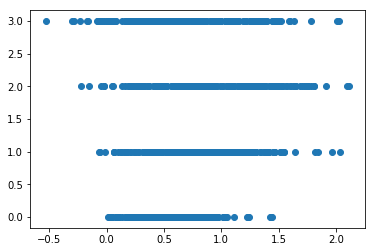

VAL_LOSS: 12.563148498535156


12.563148498535156

In [1230]:
eval_plot()

In [1231]:
learning_rate = 0.0005
parameters = list(encoder.parameters())+ list(decoder.parameters())
loss_func = nn.MSELoss(size_average=True)
optimizer = torch.optim.Adam(parameters, lr=learning_rate)


--------model not restored--------

983 984


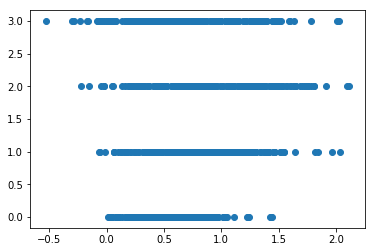

VAL_LOSS: 1.0469303131103516
Train Epoch: 0 [98000/99983 (98%)]	Loss: 0.76144272
983 984


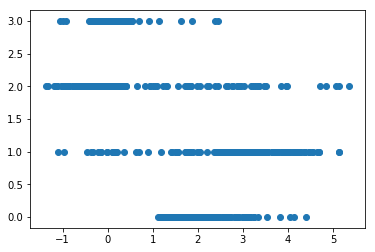

VAL_LOSS: 0.7772948145866394
Train Epoch: 1 [98000/99983 (98%)]	Loss: 0.58869642
Train Epoch: 2 [98000/99983 (98%)]	Loss: 0.54632580
983 984


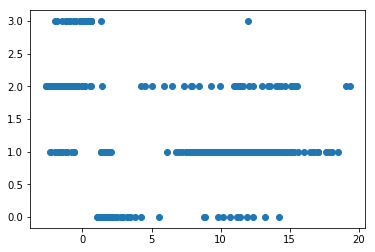

VAL_LOSS: 0.5364739894866943
Train Epoch: 3 [98000/99983 (98%)]	Loss: 0.51085663
Train Epoch: 4 [98000/99983 (98%)]	Loss: 0.57806486
983 984


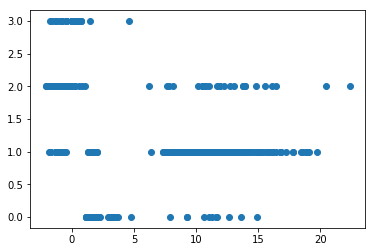

VAL_LOSS: 0.5151962041854858
Train Epoch: 5 [98000/99983 (98%)]	Loss: 0.49648845
Train Epoch: 6 [98000/99983 (98%)]	Loss: 0.50652522
983 984


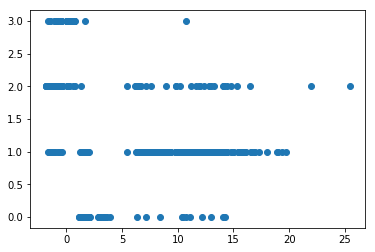

VAL_LOSS: 0.5104314088821411
Train Epoch: 7 [98000/99983 (98%)]	Loss: 0.52666628
Train Epoch: 8 [98000/99983 (98%)]	Loss: 0.52066118
983 984


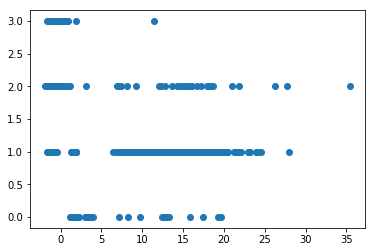

VAL_LOSS: 0.5075302124023438
Train Epoch: 9 [98000/99983 (98%)]	Loss: 0.55802631
Train Epoch: 10 [98000/99983 (98%)]	Loss: 0.48896047
983 984


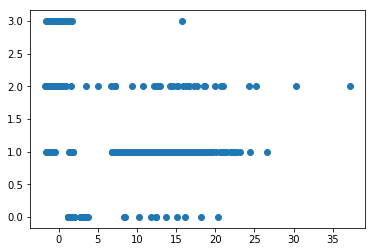

VAL_LOSS: 0.5063785314559937
Train Epoch: 11 [98000/99983 (98%)]	Loss: 0.50234383
Train Epoch: 12 [98000/99983 (98%)]	Loss: 0.50902802
983 984


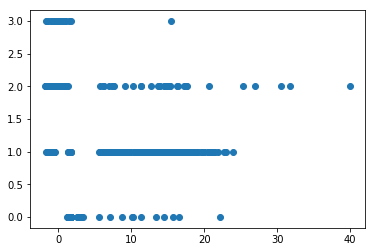

VAL_LOSS: 0.502734363079071
Train Epoch: 13 [98000/99983 (98%)]	Loss: 0.47113383
Train Epoch: 14 [98000/99983 (98%)]	Loss: 0.51164716
983 984


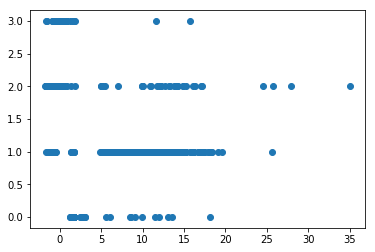

VAL_LOSS: 0.5005384683609009
Train Epoch: 15 [98000/99983 (98%)]	Loss: 0.47311381
Train Epoch: 16 [98000/99983 (98%)]	Loss: 0.52684045
983 984


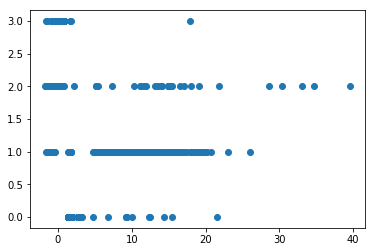

VAL_LOSS: 0.4968664050102234
Train Epoch: 17 [98000/99983 (98%)]	Loss: 0.48861995
Train Epoch: 18 [98000/99983 (98%)]	Loss: 0.51240140
983 984


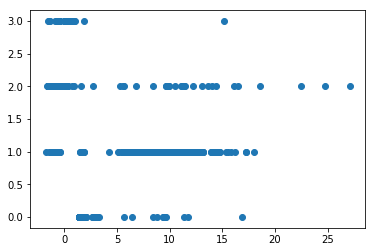

VAL_LOSS: 0.496197372674942
Train Epoch: 19 [98000/99983 (98%)]	Loss: 0.54527783
Train Epoch: 20 [98000/99983 (98%)]	Loss: 0.49438411
983 984


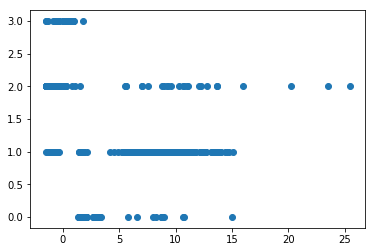

VAL_LOSS: 0.49559757113456726
Train Epoch: 21 [98000/99983 (98%)]	Loss: 0.48003703
Train Epoch: 22 [98000/99983 (98%)]	Loss: 0.56928641
983 984


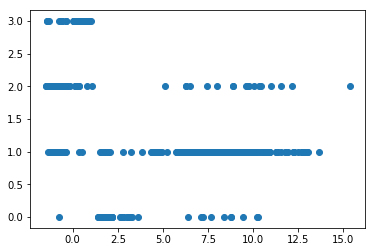

VAL_LOSS: 0.507598340511322
Train Epoch: 23 [98000/99983 (98%)]	Loss: 0.56428635
Train Epoch: 24 [98000/99983 (98%)]	Loss: 0.54539371
983 984


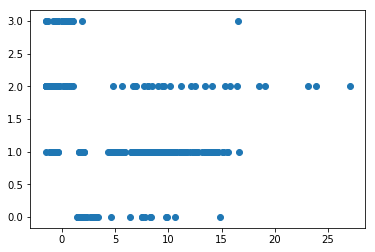

VAL_LOSS: 0.48674067854881287
Train Epoch: 25 [98000/99983 (98%)]	Loss: 0.53891283
Train Epoch: 26 [98000/99983 (98%)]	Loss: 0.48704183
983 984


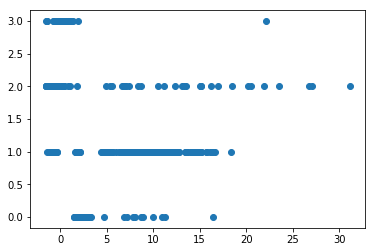

VAL_LOSS: 0.4845393896102905
Train Epoch: 27 [98000/99983 (98%)]	Loss: 0.52605325
Train Epoch: 28 [98000/99983 (98%)]	Loss: 0.51354384
983 984


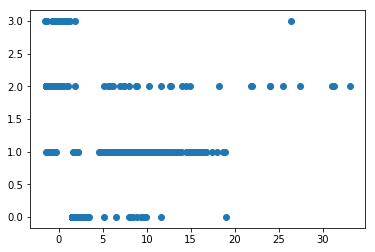

VAL_LOSS: 0.48387712240219116
Train Epoch: 29 [98000/99983 (98%)]	Loss: 0.48488781
Train Epoch: 30 [98000/99983 (98%)]	Loss: 0.44861400
983 984


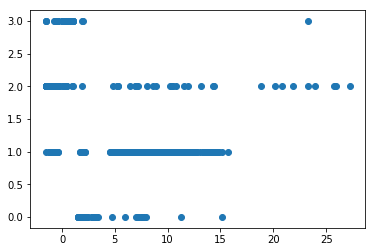

VAL_LOSS: 0.4795563220977783
Train Epoch: 31 [98000/99983 (98%)]	Loss: 0.48373759
Train Epoch: 32 [98000/99983 (98%)]	Loss: 0.46344873
983 984


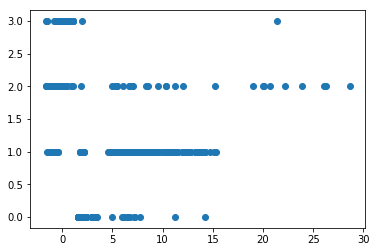

VAL_LOSS: 0.4797076880931854
Train Epoch: 33 [98000/99983 (98%)]	Loss: 0.52329671
Train Epoch: 34 [98000/99983 (98%)]	Loss: 0.51424330
983 984


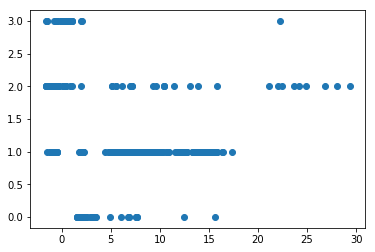

VAL_LOSS: 0.4774720072746277
Train Epoch: 35 [98000/99983 (98%)]	Loss: 0.49948582
Train Epoch: 36 [98000/99983 (98%)]	Loss: 0.51039869
983 984


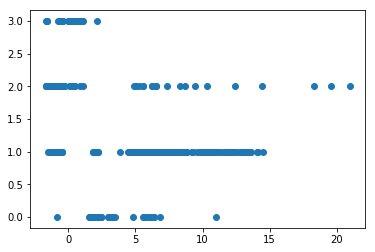

VAL_LOSS: 0.4821024239063263
Train Epoch: 37 [98000/99983 (98%)]	Loss: 0.45980814
Train Epoch: 38 [98000/99983 (98%)]	Loss: 0.44578990
983 984


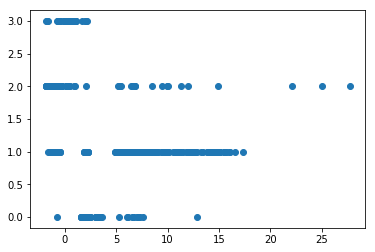

VAL_LOSS: 0.47971251606941223
Train Epoch: 39 [98000/99983 (98%)]	Loss: 0.52883780
Train Epoch: 40 [98000/99983 (98%)]	Loss: 0.51180178
983 984


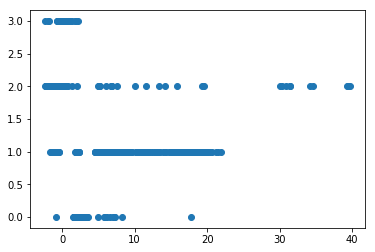

VAL_LOSS: 0.47226008772850037
Train Epoch: 41 [98000/99983 (98%)]	Loss: 0.44865742
Train Epoch: 42 [98000/99983 (98%)]	Loss: 0.49709240
983 984


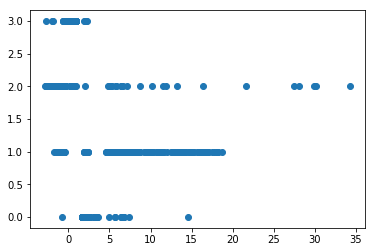

VAL_LOSS: 0.46976661682128906
Train Epoch: 43 [98000/99983 (98%)]	Loss: 0.49997294
Train Epoch: 44 [98000/99983 (98%)]	Loss: 0.48262182
983 984


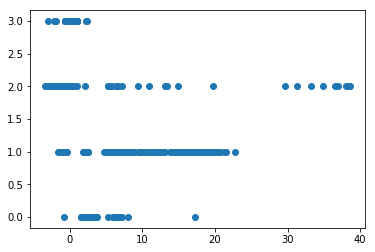

VAL_LOSS: 0.4616490304470062
Train Epoch: 45 [98000/99983 (98%)]	Loss: 0.49404231
Train Epoch: 46 [98000/99983 (98%)]	Loss: 0.47131515
983 984


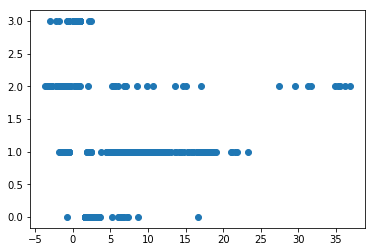

VAL_LOSS: 0.4611457288265228
Train Epoch: 47 [98000/99983 (98%)]	Loss: 0.44814515
Train Epoch: 48 [68000/99983 (68%)]	Loss: 0.43317053

KeyboardInterrupt: 

In [1232]:
# train encoder and decoder
# save and load model
epochs = 1000

try:
    encoder, decoder = torch.load('./model/dimredux_1.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass

train_losses = []
val_losses = []
#val_loss = evaluate() 
#val_losses.append(val_loss)
eval_plot()
for epoch in range(epochs):
    encoder.train()
    decoder.train()
    for batch_idx, (x,y) in enumerate(data_loader):
        batchsize = x.size()[0]
        x,y = Variable(x),Variable(y)

        optimizer.zero_grad()
        output = encoder(x)
        output = decoder(output)
        loss = loss_func(output,y)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss)
            
        if batch_idx % 10 == 0:
            print('\rTrain Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.8f}'.format(
                epoch, batch_idx * batch_size, len(data_loader.dataset),
                100. * batch_idx / len(data_loader), loss),end='')
        
    print()
    if epoch % 2 == 0:
        eval_plot()
    # val_loss = evaluate() 
    # val_losses.append(val_loss)
    # if val_loss < val_losses[-2]:
    #     print("taking snapshot")
    #     torch.save([encoder,decoder],'./model/deno_autoencoder-0_79.pkl')

In [1271]:
def predict_class(test_x, validation_x, val_y):
    val_set = timeLaggedDataset(validation_x,x_lag,y_lag,overlay)
    val_loader = utils.DataLoader(val_set, batch_size=len(val_set), shuffle=False)
    print(len(val_set))
    
    test_set = timeLaggedDataset(test_x,x_lag,y_lag,overlay)
    test_loader = utils.DataLoader(test_set, batch_size=len(test_set), shuffle=False)
    
    encoder.eval()
    for x,y in val_loader:
        val_out = encoder(x)
        
    print(val_out.size())
    
    for x,y in test_loader:
        test_out = encoder(x)
        
    print(test_out.size())
    
    val_out = val_out.detach().numpy()
    test_out = test_out.detach().numpy()
    
    #get means on reduced dimension
    mean = np.zeros(4)
    for i in range(4):
        print((validation_y == i).shape)
        mean[i] = val_out[(validation_y[x_lag:min(-1,-( y_lag - overlay -1))] == i)].mean()
    
    print(mean)
    pred_val_mtrx = np.zeros((len(val_set),4))
    pred_test_mtrx = np.zeros((len(test_set),4))
    for i in range(4):
        pred_val_mtrx[:,i] = (val_out - mean[i])[:,0]
        pred_test_mtrx[:,i] = (test_out - mean[i])[:,0]
    
    pred_val = np.argmin(np.abs(pred_val_mtrx),axis=1)
    pred_test = np.argmin(np.abs(pred_test_mtrx),axis=1)
    
    acc = (pred_val == validation_y[x_lag:min(-1,-( y_lag - overlay -1))]).mean()
    print("Accuracy: ", acc)
    return pred_test, pred_val
    
pred_test, pred_val = predict_class(data_x_white,validation_x_white,validation_y)    
    

983
torch.Size([983, 1])
torch.Size([99983, 1])
(1000,)
(1000,)
(1000,)
(1000,)
[ 2.34881711  7.67590475  1.67627728  0.59630519]
Accuracy:  0.563580874873


In [1260]:
pred_val == validation_x[x_lag:min(-1,-( y_lag - overlay -1))]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [ ]:
parameters

In [1266]:
pred_val.shape

(983,)

In [1268]:
validation_y[x_lag:min(-1,-( y_lag - overlay -1))].shape

(983,)

In [1265]:
validation_x.shape

(1000, 3)

In [1269]:
pred_val == validation_y[x_lag:min(-1,-( y_lag - overlay -1))]

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [1277]:
(validation_y == 3).sum()

209

In [1278]:
encoder

Encoder(
  (layers): Sequential(
    (0): Conv1d(3, 64, kernel_size=(4,), stride=(1,), padding=(2,))
    (1): ReLU()
    (2): Conv1d(64, 64, kernel_size=(4,), stride=(1,), padding=(2,))
    (3): ReLU()
  )
  (fclayers): Sequential(
    (0): Linear(in_features=1152, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
    (3): Linear(in_features=256, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [1279]:
decoder

Decoder(
  (fclayers): Sequential(
    (0): Linear(in_features=1, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
  )
  (convlayers): Sequential(
    (0): ConvTranspose1d(4, 8, kernel_size=(2,), stride=(1,))
    (1): ReLU()
    (2): ConvTranspose1d(8, 8, kernel_size=(4,), stride=(1,))
    (3): ReLU()
    (4): Conv1d(8, 8, kernel_size=(3,), stride=(1,))
    (5): ReLU()
    (6): Conv1d(8, 3, kernel_size=(3,), stride=(1,))
  )
  (test): Sequential(
    (0): Linear(in_features=1, out_features=3, bias=True)
    (1): ReLU()
    (2): Linear(in_features=3, out_features=6, bias=True)
    (3): ReLU()
    (4): Linear(in_features=6, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=12, bias=True)
    (7): ReLU()
    (8): Linear(in_features=12, out_features=12, bias=True)
  )
  (test2): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in